In [101]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
def load_img():
    blank_img =np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCDE',org=(50,300), fontFace=font,fontScale= 5,color=(255,255,255),thickness=25,lineType=cv2.LINE_AA)
    return blank_img

In [103]:
def load2_img(filename):
    img = cv2.imread(filename).astype(np.float32) / 255
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [104]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [105]:
img = load_img()

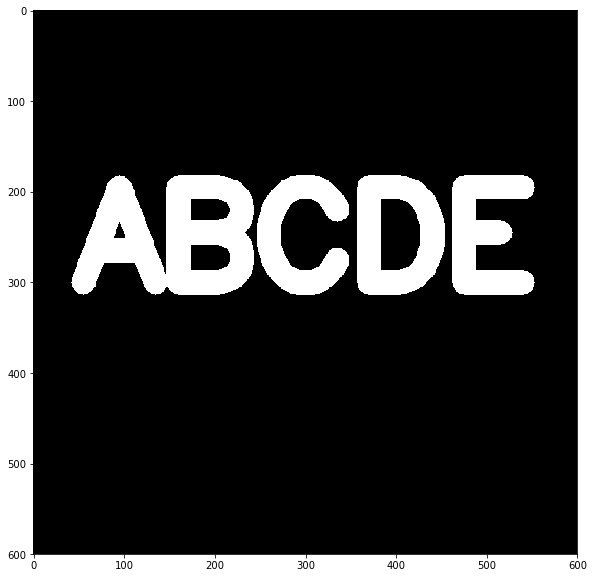

In [106]:
display_img(img)

Erodes away boundaries of foreground objects. Works best when foreground is light color (preferrably white) and background is dark.

In [107]:
kernel = np.ones((5,5),np.uint8)
erosion1 = cv2.erode(img,kernel,iterations = 1)

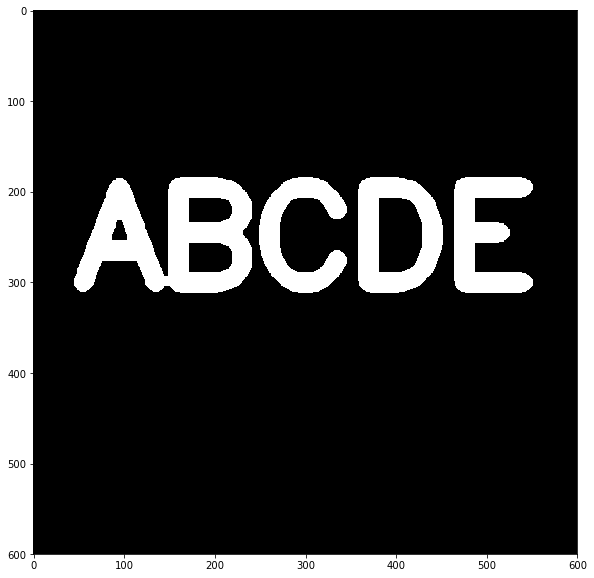

In [108]:
display_img(erosion1)

In [109]:
img = load_img()
kernel = np.ones((5,5),np.uint8)
erosion5 = cv2.erode(img,kernel,iterations = 4)

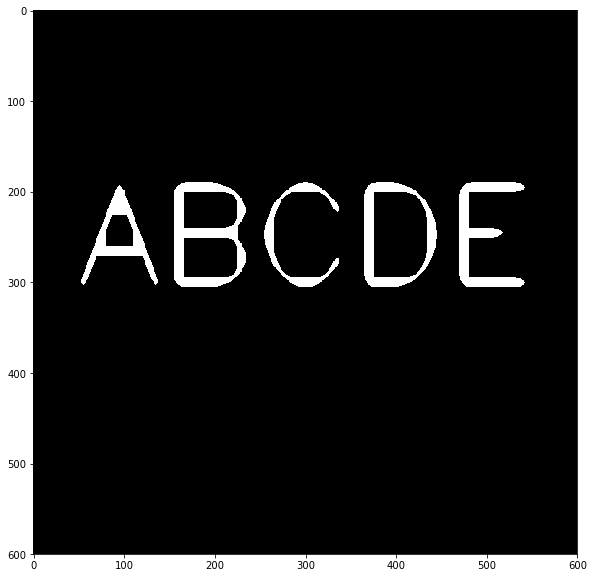

In [110]:
display_img(erosion5)

In [111]:
img = load_img()

In [112]:
white_noise = np.random.randint(low=0,high=2,size=(600,600))

In [113]:
white_noise

array([[1, 1, 1, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1]])

In [114]:
white_noise = white_noise*255

In [115]:
white_noise.shape

(600, 600)

In [116]:
img.shape

(600, 600)

In [117]:
noise_img = white_noise+img

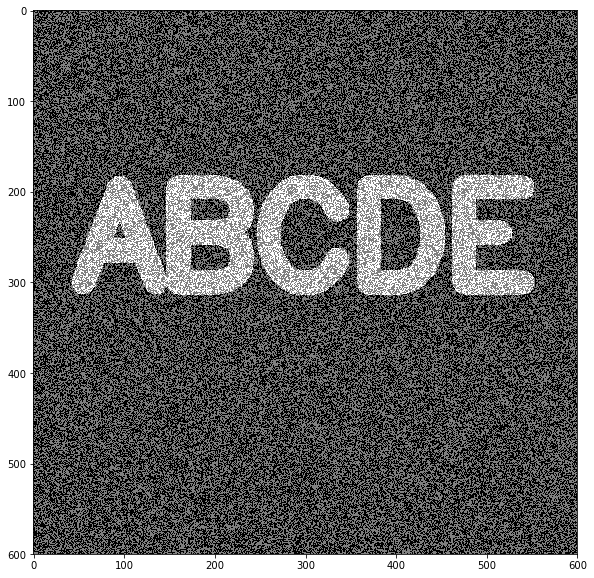

In [118]:
display_img(noise_img)

In [119]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)

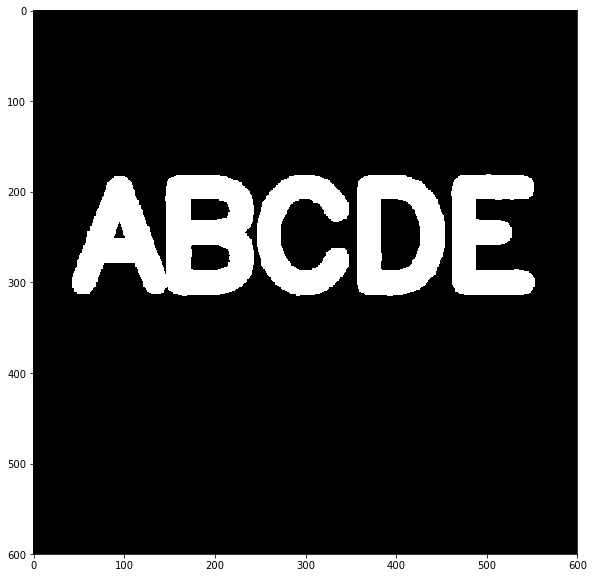

In [120]:
display_img(opening)

In [121]:
img = load_img()

In [122]:
black_noise = np.random.randint(low=0,high=2,size=(600,600))

In [123]:
black_noise

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 1, ..., 1, 1, 1],
       ...,
       [0, 1, 0, ..., 1, 1, 1],
       [0, 1, 0, ..., 1, 1, 1],
       [0, 1, 0, ..., 0, 1, 1]])

In [124]:
black_noise= black_noise * -255

In [125]:
black_noise_img = img + black_noise

In [126]:
black_noise_img

array([[-255., -255., -255., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ..., -255.,    0.,    0.],
       [-255.,    0., -255., ..., -255., -255., -255.],
       ...,
       [   0., -255.,    0., ..., -255., -255., -255.],
       [   0., -255.,    0., ..., -255., -255., -255.],
       [   0., -255.,    0., ...,    0., -255., -255.]])

In [127]:
black_noise_img[black_noise_img==-255] = 0

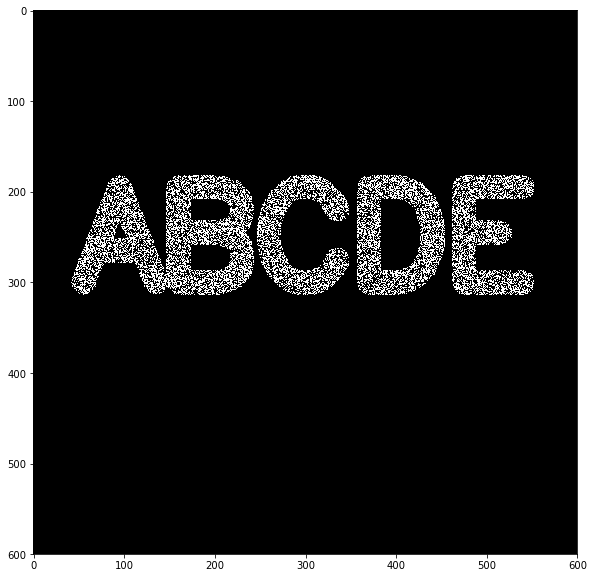

In [128]:
display_img(black_noise_img)

In [129]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)

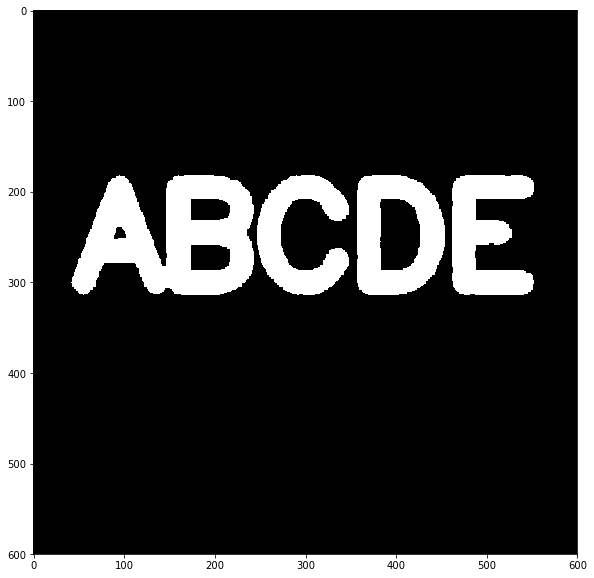

In [130]:
display_img(closing)

In [131]:
img = load_img()

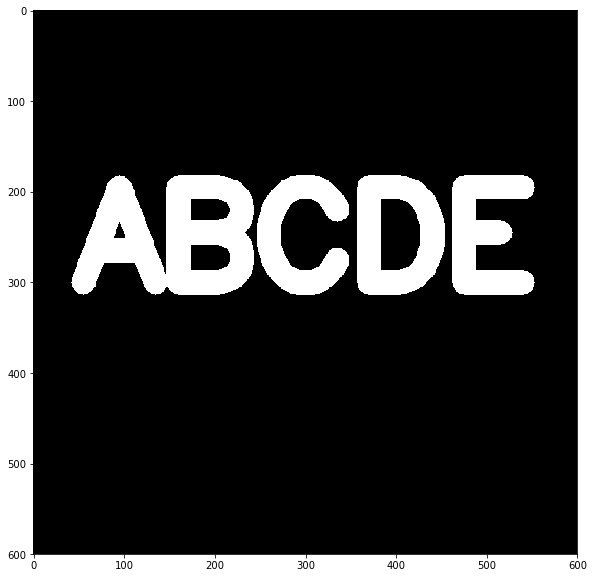

In [132]:
display_img(img)

In [133]:
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)

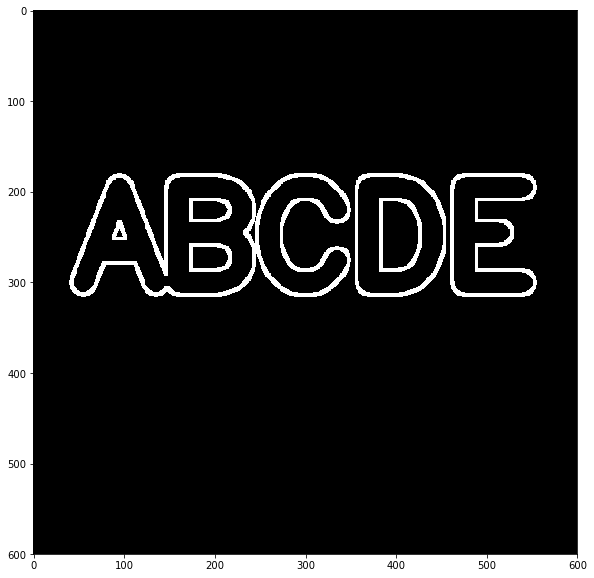

In [134]:
display_img(gradient)